## 机器学习算法基础案例

In [ ]:
#pip install -U scikit-learn  # install the package sklearn

In [1]:
import matplotlib.pyplot as plt
from visualization import plot_pic
import warnings; warnings.simplefilter('ignore') #忽略可能会出现的警告信息，警告并不是错误，可以忽略；


### 1.数据集生成及特征工程处理

In [4]:
import baostock as bs
lg = bs.login()
print('login respond error_code:'+lg.error_code)
print('login respond  error_msg:'+lg.error_msg)

login success!
login respond error_code:0
login respond  error_msg:success


In [5]:
import numpy as np

In [9]:
import pandas as pd
#hs300 = ts.get_k_data('hs300', start = '2019-01-01', end = '2022-06-25')   #训练集数据
lg = bs.login()
# 获取沪深300成分股
hs300 = bs.query_hs300_stocks()
print('query_hs300 error_code:'+hs300.error_code)
print('query_hs300  error_msg:'+hs300.error_msg)

# 打印结果集
hs300_stocks = []
while (hs300.error_code == '0') & hs300.next():
    # 获取一条记录，将记录合并在一起
    hs300_stocks.append(hs300.get_row_data())
result = pd.DataFrame(hs300_stocks, columns=hs300.fields)
# 结果集输出到csv文件
result.to_csv(r"E:\AQF\hs300_stocks.csv", encoding="gbk", index=False)
print(result)

# 登出系统
bs.logout()


login success!
query_hs300 error_code:0
query_hs300  error_msg:success
     updateDate       code code_name
0    2024-08-26  sh.600000      浦发银行
1    2024-08-26  sh.600009      上海机场
2    2024-08-26  sh.600010      包钢股份
3    2024-08-26  sh.600011      华能国际
4    2024-08-26  sh.600015      华夏银行
..          ...        ...       ...
295  2024-08-26  sz.300919      中伟股份
296  2024-08-26  sz.300957       贝泰妮
297  2024-08-26  sz.300979      华利集团
298  2024-08-26  sz.300999       金龙鱼
299  2024-08-26  sz.301269      华大九天

[300 rows x 3 columns]
logout success!


In [2]:
# 生成测试数据集
from produce_data import produce_data
data = produce_data()

In [60]:
data

,practice,time_period,error,label
0,0.548814,0.592880,0.811518,1.0
1,0.715189,0.010064,0.476084,0.0
2,0.602763,0.475826,0.523156,1.0
3,0.544883,0.708770,0.250521,1.0
4,0.423655,0.043975,0.605043,0.0
...,...,...,...,...
995,0.097676,0.791282,0.941687,0.0
996,0.514922,0.721198,0.546133,1.0
997,0.938412,0.480108,0.323614,1.0
998,0.228647,0.643864,0.813545,1.0


In [17]:
#code__list = result['code']
code = "sh.000300"
lg = bs.login()
hs300_k = bs.query_history_k_data_plus(code,
    "date,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,isST",
    start_date='2019-01-01', end_date='2022-06-25',
    frequency="d")
#for frequency in [5,15,30,60], time can be included in filed
print('query_history_k_data_plus respond error_code:'+hs300_k.error_code)
print('query_history_k_data_plus respond  error_msg:'+hs300_k.error_msg)

#### 打印结果集 ####
data_list = []
while (hs300_k.error_code == '0') & hs300_k.next():
    # 获取一条记录，将记录合并在一起
    data_list.append(hs300_k.get_row_data())
result = pd.DataFrame(data_list, columns=hs300_k.fields)

#### 结果集输出到csv文件 ####   
result.to_csv(r"E:\AQF\history_hs300_stock_k_data.csv", index=False)
print(result)

login success!
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
           date       code       open       high        low      close  \
0    2019-01-02  sh.000300  3017.0670  3018.7750  2958.4880  2969.5350   
1    2019-01-03  sh.000300  2963.0180  3000.4410  2953.2540  2964.8420   
2    2019-01-04  sh.000300  2940.1910  3036.8140  2935.8290  3035.8740   
3    2019-01-07  sh.000300  3055.1530  3061.7490  3035.9120  3054.3030   
4    2019-01-08  sh.000300  3049.8740  3055.5100  3038.5330  3047.7030   
..          ...        ...        ...        ...        ...        ...   
838  2022-06-20  sh.000300  4322.8324  4368.3555  4297.8912  4330.4328   
839  2022-06-21  sh.000300  4327.9159  4357.3396  4287.1406  4325.5657   
840  2022-06-22  sh.000300  4331.9020  4333.1827  4269.2456  4270.6227   
841  2022-06-23  sh.000300  4277.9555  4343.8781  4260.9002  4343.8781   
842  2022-06-24  sh.000300  4354.5530  4400.6852  4346.1221  4394.7723 

In [113]:
#特征的生成(1-7 days ago close price)；
for i in range(1, 8, 1):
    result['close - ' + str(i) + 'd'] = result['close'].shift(i)
    
print(result)
print(result.columns)

           date       code       open       high        low      close  \
0    2019-01-02  sh.000300  3017.0670  3018.7750  2958.4880  2969.5350   
1    2019-01-03  sh.000300  2963.0180  3000.4410  2953.2540  2964.8420   
2    2019-01-04  sh.000300  2940.1910  3036.8140  2935.8290  3035.8740   
3    2019-01-07  sh.000300  3055.1530  3061.7490  3035.9120  3054.3030   
4    2019-01-08  sh.000300  3049.8740  3055.5100  3038.5330  3047.7030   
..          ...        ...        ...        ...        ...        ...   
838  2022-06-20  sh.000300  4322.8324  4368.3555  4297.8912  4330.4328   
839  2022-06-21  sh.000300  4327.9159  4357.3396  4287.1406  4325.5657   
840  2022-06-22  sh.000300  4331.9020  4333.1827  4269.2456  4270.6227   
841  2022-06-23  sh.000300  4277.9555  4343.8781  4260.9002  4343.8781   
842  2022-06-24  sh.000300  4354.5530  4400.6852  4346.1221  4394.7723   

      preclose       volume             amount adjustflag  ... tradestatus  \
0    3010.6530   6866302208   761

In [22]:
hs300_7days = result.iloc[7:,:]
print(hs300_7days)

           date       code       open       high        low      close  \
7    2019-01-11  sh.000300  3082.2610  3102.8330  3071.0260  3094.7780   
8    2019-01-14  sh.000300  3092.4980  3097.4060  3064.3820  3067.7840   
9    2019-01-15  sh.000300  3071.5180  3129.3700  3064.6700  3127.9900   
10   2019-01-16  sh.000300  3126.1340  3135.0110  3117.2920  3128.6510   
11   2019-01-17  sh.000300  3132.6280  3141.7090  3110.0600  3111.4160   
..          ...        ...        ...        ...        ...        ...   
838  2022-06-20  sh.000300  4322.8324  4368.3555  4297.8912  4330.4328   
839  2022-06-21  sh.000300  4327.9159  4357.3396  4287.1406  4325.5657   
840  2022-06-22  sh.000300  4331.9020  4333.1827  4269.2456  4270.6227   
841  2022-06-23  sh.000300  4277.9555  4343.8781  4260.9002  4343.8781   
842  2022-06-24  sh.000300  4354.5530  4400.6852  4346.1221  4394.7723   

      preclose       volume             amount adjustflag  ... tradestatus  \
7    3072.6860   7178642432   774

In [478]:
#plt.scatter(hs300_7days['volume'],hs300_7days['pctChg'])
print(type( hs300_7days['volume']))
print(hs300_7days.shape)
dat = np.zeros((hs300_7days.shape[0],10))
dat[:,0] = np.array(hs300_7days['volume'],dtype='float')
dat[:,1] = np.array(hs300_7days['pctChg'],dtype ='float')
dat[:,2] = np.array(hs300_7days['close'],dtype ='float')
for i in range(1,8):
    dat[:,i+2] = np.array(hs300_7days['close - '+str(i)+'d'],dtype = 'float')
dat = pd.DataFrame(dat,columns =['volume','pctChg','close','close -1d','close -2d','close -3d','close -4d','close -5d','close -6d','close -7d'])

<class 'pandas.core.series.Series'>
(836, 22)


In [200]:
dat
train_data = dat.dropna().copy()     #train_data和features_train
train_data['label']= np.sign(train_data.iloc[:,1])
train_data.drop(['pctChg'],axis = 1,inplace=True)
train_data.head()

,volume,close,close -1d,close -2d,close -3d,close -4d,close -5d,close -6d,close -7d,label
0,7.178642e+09,3094.778,3072.686,3078.475,3047.703,3054.303,3035.874,2964.842,2969.535,1.0
1,6.612170e+09,3067.784,3094.778,3072.686,3078.475,3047.703,3054.303,3035.874,2964.842,-1.0
2,8.877296e+09,3127.990,3067.784,3094.778,3072.686,3078.475,3047.703,3054.303,3035.874,1.0
3,8.021434e+09,3128.651,3127.990,3067.784,3094.778,3072.686,3078.475,3047.703,3054.303,1.0
4,8.017487e+09,3111.416,3128.651,3127.990,3067.784,3094.778,3072.686,3078.475,3047.703,-1.0


In [61]:
import sklearn
from sklearn import linear_model

In [201]:
from sklearn.model_selection import train_test_split
'''#train_test_split(hs300_7days[['pctChg', 'volume']], hs300_7days['isST'], test_size=0.25)'''
features_train, features_test, label_train, label_test = \
train_test_split(train_data.iloc[:,0:-1], train_data.iloc[:,-1], test_size=0.25)

In [202]:
print(features_train.head())
print(features_test.head())
print(label_train.head())
print(label_test.head())

           volume      close  close -1d  close -2d  close -3d  close -4d  \
246  1.046331e+10  4166.7340  4189.8860  4203.9880  4163.1840  4164.3690   
39   1.908172e+10  3698.4850  3724.1940  3755.3510  3729.9540  3657.5790   
56   1.829568e+10  4075.4300  4057.2280  4062.2300  4022.1560  3971.2850   
48   1.387585e+10  3743.3870  3700.4380  3742.8250  3833.8010  3836.8910   
826  1.684756e+10  4189.3527  4238.9936  4175.6747  4219.8122  4179.1285   

     close -5d  close -6d  close -7d  
246   4112.317  4160.2270  4129.2950  
39    3808.849  3848.0900  3816.0130  
56    3973.928  3872.3410  3728.3950  
48    3835.439  3833.9620  3851.7470  
826   4166.085  4089.5682  4083.1772  
           volume      close  close -1d  close -2d  close -3d  close -4d  \
712  1.490054e+10  4954.7599  5034.7321  5005.8991  5049.6953  5083.8007   
326  1.007912e+10  3935.2220  3956.2495  3922.9117  3912.8159  3925.2177   
443  1.644705e+10  4904.8981  4953.8756  4981.3497  4885.7178  4885.1118   
779  

In [203]:
lm = linear_model.LogisticRegression(C=1000)

In [204]:
X_train = sklearn.preprocessing.scale(features_train)

In [205]:
lm.fit(X_train, label_train)
#y_train.replace(to_replace= np.NaN, value = 0,inplace = True)
#y_train = y_train.values.reshape(-1,1)
#y_train[-10:]

LogisticRegression(C=1000)

In [138]:
lm.score(X_train, label_train)

0.9904306220095693

In [206]:
close_fall = train_data[train_data['label']<0]['close']
volume_fall = train_data[train_data['label']<0]['volume']

close_rise = train_data[train_data['label']>0]['close']
volume_rise = train_data[train_data['label']>0]['volume']

In [207]:
print(close_fall.head())
print(volume_fall.head())
print(close_rise.head())
print(volume_rise.head())

1     3067.784
4     3111.416
7     3143.317
8     3141.053
11    3183.777
Name: close, dtype: float64
1     6.612170e+09
4     8.017487e+09
7     7.299053e+09
8     5.987048e+09
11    8.262243e+09
Name: volume, dtype: float64
0    3094.778
2    3127.990
3    3128.651
5    3168.173
6    3185.636
Name: close, dtype: float64
0    7.178642e+09
2    8.877296e+09
3    8.021434e+09
5    1.039638e+10
6    9.391502e+09
Name: volume, dtype: float64


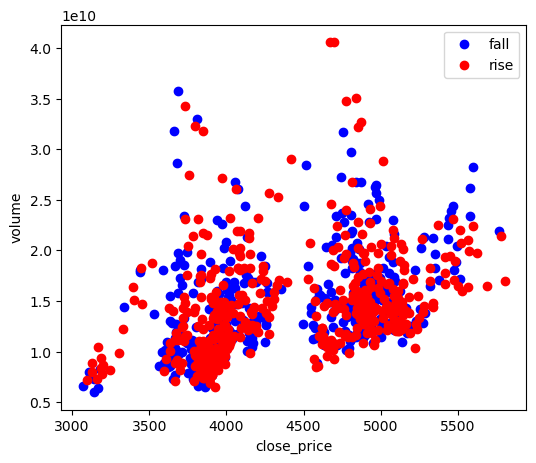

In [208]:
#
plt.figure(figsize = (6,5))
#plt.xlim(0.0, 1.0)
#plt.ylim(0.0, 1.0)
plt.scatter(close_fall, volume_fall, color = 'b', label='fall')
plt.scatter(close_rise, volume_rise, color = 'r', label='rise')
plt.xlabel('close_price')
plt.ylabel('volume')
plt.legend(loc='upper right')
plt.show()

### 2. 逻辑回归算法实现

In [217]:
print(features_train.head())
print(label_train.head())
print(features_test.head())
print(label_test.head())

           volume      close  close -1d  close -2d  close -3d  close -4d  \
246  1.046331e+10  4166.7340  4189.8860  4203.9880  4163.1840  4164.3690   
39   1.908172e+10  3698.4850  3724.1940  3755.3510  3729.9540  3657.5790   
56   1.829568e+10  4075.4300  4057.2280  4062.2300  4022.1560  3971.2850   
48   1.387585e+10  3743.3870  3700.4380  3742.8250  3833.8010  3836.8910   
826  1.684756e+10  4189.3527  4238.9936  4175.6747  4219.8122  4179.1285   

     close -5d  close -6d  close -7d  
246   4112.317  4160.2270  4129.2950  
39    3808.849  3848.0900  3816.0130  
56    3973.928  3872.3410  3728.3950  
48    3835.439  3833.9620  3851.7470  
826   4166.085  4089.5682  4083.1772  
246   -1.0
39    -1.0
56     1.0
48     1.0
826   -1.0
Name: label, dtype: float64
           volume      close  close -1d  close -2d  close -3d  close -4d  \
712  1.490054e+10  4954.7599  5034.7321  5005.8991  5049.6953  5083.8007   
326  1.007912e+10  3935.2220  3956.2495  3922.9117  3912.8159  3925.2177  

In [261]:
def plot_pic(clf, X_test, y_test,col1,col2):
    data = X_test.copy()
    data['label'] = y_test
    
    x_min = min(X_test[:,[col1,col2]]); x_max = max(X_test[:,[col1,col2]])
    y_min = min(y_test); y_max = max(y_test)
    
    # 画出决策边界，我们为每一个点绘制一个颜色

    step = (x_max-x_min)/50  # 设置步长
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # 绘图
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.RdYlBu)
    
    practice_fail = data[data['label']==0][col1]
    time_period_fail = data[data['label']==0][col2]
    practice_pass = data[data['label']==1][col1]
    time_period_pass = data[data['label']==1][col2]


    plt.scatter(practice_fail, time_period_fail, color = 'b', label='fail')
    plt.scatter(practice_pass, time_period_pass, color = 'r', label='pass')
    plt.legend()
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.legend(loc='upper right')

In [179]:
def plot_pic2(clf,x,y,x_test,y_test):
    import matplotlib as mpl
    x1_min,x1_max = x[:,0].min(),x[:,0].max()
    x2_min,x2_max = x[:,1].min(),x[:,1].max()
    x1,x2 = np.mgrid[x1_min:x1_max:500j,x2_min:x2_max:500j]
    grid_test = np.stack((x1.flat,x2.flat),axis = 1)
    grid_hat = clf.predict(grid_test)
    grid_hat = grid_hat.reshape(x1.shape)
    cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
    cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
    plt.pcolormesh(x1,x2,grid_hat,cmap=cm_light)
    plt.scatter(x[:,0],x[:,1],c=y[:,0],edgecolor='k',s=50,cmap=cm_dark)
    plt.scatter(x_test[:,0],x_test[:,1],s=120,facecolor='none',zorder=10)
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus']=False
    plt.xlabel("花萼长度")
    plt.ylabel("花萼宽度")
    plt.title('鸢尾花SVM二特征分类',fontsize=15)

In [218]:
features_test

,volume,close,close -1d,close -2d,close -3d,close -4d,close -5d,close -6d,close -7d,label
712,1.490054e+10,4954.7599,5034.7321,5005.8991,5049.6953,5083.8007,5055.1172,5078.6901,4995.9298,-1.0
326,1.007912e+10,3935.2220,3956.2495,3922.9117,3912.8159,3925.2177,3968.2529,3960.2378,3960.1803,-1.0
443,1.644705e+10,4904.8981,4953.8756,4981.3497,4885.7178,4885.1118,4813.6564,4777.5608,4720.8313,-1.0
779,1.383460e+10,4254.0989,4134.1441,4148.4663,4174.5742,4251.3061,4276.5174,4255.2950,4258.7459,1.0
592,1.363561e+10,5147.3938,5122.1583,5090.3854,5102.4657,5101.8924,5080.4909,5166.5597,5224.7030,1.0
...,...,...,...,...,...,...,...,...,...,...
126,9.210138e+09,3781.6830,3807.9550,3768.4010,3804.6380,3806.8440,3824.1870,3808.7310,3785.2210,-1.0
249,1.224091e+10,4185.8300,4154.8530,4149.0430,4166.7340,4189.8860,4203.9880,4163.1840,4164.3690,1.0
506,1.648873e+10,5686.2502,5564.5618,5483.4140,5473.9475,5485.2008,5501.0915,5417.6484,5351.9646,1.0
483,2.198721e+10,5513.6568,5417.6677,5368.5049,5267.7181,5211.2885,5113.7105,5042.9361,5064.4147,1.0


In [229]:
features_test['label'] = label_test


In [230]:
features_test.head()

,volume,close,close -1d,close -2d,close -3d,close -4d,close -5d,close -6d,close -7d,label
712,1.490054e+10,4954.7599,5034.7321,5005.8991,5049.6953,5083.8007,5055.1172,5078.6901,4995.9298,-1.0
326,1.007912e+10,3935.2220,3956.2495,3922.9117,3912.8159,3925.2177,3968.2529,3960.2378,3960.1803,-1.0
443,1.644705e+10,4904.8981,4953.8756,4981.3497,4885.7178,4885.1118,4813.6564,4777.5608,4720.8313,-1.0
779,1.383460e+10,4254.0989,4134.1441,4148.4663,4174.5742,4251.3061,4276.5174,4255.2950,4258.7459,1.0
592,1.363561e+10,5147.3938,5122.1583,5090.3854,5102.4657,5101.8924,5080.4909,5166.5597,5224.7030,1.0


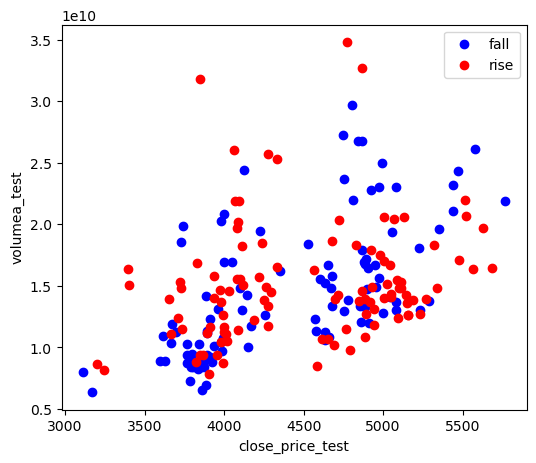

In [231]:
close_fall_t = features_test[features_test['label']<0]['close']
volume_fall_t = features_test[features_test['label']<0]['volume']

close_rise_t = features_test[features_test['label']>0]['close']
volume_rise_t = features_test[features_test['label']>0]['volume']
#
plt.figure(figsize = (6,5))
#plt.xlim(0.0, 1.0)
#plt.ylim(0.0, 1.0)
plt.scatter(close_fall_t, volume_fall_t, color = 'b', label='fall')
plt.scatter(close_rise_t, volume_rise_t, color = 'r', label='rise')
plt.xlabel('close_price_test')
plt.ylabel('volumea_test')
plt.legend(loc='upper right')
plt.show()

In [232]:
features_test.drop(['label'],axis =1,inplace = True)

In [233]:
from sklearn.linear_model import LogisticRegression    #从sklearn中引入逻辑回归算法；必背；
clf_LR = LogisticRegression(C=1000)     #定义了逻辑回归的分类器，clf_LR，初始化模型；
clf_LR.fit(features_train,label_train)     #机器学习的核心语句，必背；fit就是训练和学习的过程；
pred_LR = clf_LR.predict(features_test)     #机器学习的核心语句，必背；predict预测测试集的标签；返回的是预测的测试集的label
#print(pred_LR)
#测试集的分类效果可视化；传入已经学习好的分类器和测试集的特征，去预测测试集的标签，并且把分类结果可视化；
#plot_pic(clf_LR.fit(features_train[:,0:2],label_train),features_test[:,0:2], label_test,'volume','close')    

In [234]:
#features_train['prediction'] = np.NaN
features_train['prediction'] = clf_LR.predict(features_train)    #返回的是预测的训练集的labels；[7:]

In [269]:
print(dat.dropna()['pctChg'])
print(dat)
#print(dat['prediction'])

1     -0.872200
2      1.962500
3      0.021100
4     -0.550900
5      1.824200
         ...   
831    0.496361
832   -0.112393
833   -1.270192
834    1.715333
835    1.171630
Name: pctChg, Length: 835, dtype: float64
           volume    pctChg      close  close -1d  close -2d  close -3d  \
0    7.178642e+09  0.719000  3094.7780  3072.6860  3078.4750  3047.7030   
1    6.612170e+09 -0.872200  3067.7840  3094.7780  3072.6860  3078.4750   
2    8.877296e+09  1.962500  3127.9900  3067.7840  3094.7780  3072.6860   
3    8.021434e+09  0.021100  3128.6510  3127.9900  3067.7840  3094.7780   
4    8.017487e+09 -0.550900  3111.4160  3128.6510  3127.9900  3067.7840   
..            ...       ...        ...        ...        ...        ...   
831  1.656664e+10  0.496361  4330.4328  4309.0444  4250.0614  4278.2178   
832  1.646676e+10 -0.112393  4325.5657  4330.4328  4309.0444  4250.0614   
833  1.585659e+10 -1.270192  4270.6227  4325.5657  4330.4328  4309.0444   
834  1.708824e+10  1.715333  434

In [402]:
dat_train, dat_test, l_train, l_test = \
train_test_split(dat.dropna().drop(['pctChg'],axis = 1), np.sign(dat.dropna().loc[:,'pctChg']), test_size=0.25)

In [403]:
print(dat_train.head())
print(l_train.head())

           volume      close  close -1d  close -2d  close -3d  close -4d  \
489  2.386374e+10  5458.0812  5470.4563  5577.9711  5596.3525  5441.1583   
77   1.033919e+10  3668.7250  3730.4510  3599.7000  3667.4570  3720.6680   
211  1.115135e+10  3891.6530  3878.2060  3849.9940  3889.5980  3907.8640   
367  2.460689e+10  4680.3046  4544.7007  4516.2532  4744.4687  4806.6902   
107  1.240759e+10  3801.3090  3841.2650  3833.9380  3828.5180  3715.9380   

     close -5d  close -6d  close -7d  prediction  ...  SVCprediction  \
489  5495.4306  5513.6568  5417.6677         1.0  ...            1.0   
77   3684.6160  3913.2110  3900.3330         1.0  ...            1.0   
211  3947.0390  3907.9290  3877.0890         1.0  ...            1.0   
367  4852.9612  4753.1333  4840.7712         1.0  ...            1.0   
107  3667.6180  3654.8240  3654.8790         1.0  ...            1.0   

      SVCstrategy    SVCcum_ret  DTprediction    DTstrategy     DTcum_ret  \
489  5.447879e-10  9.364903e-10  

In [409]:
clf_LR = LogisticRegression(C=1000)     #定义了逻辑回归的分类器，clf_LR，初始化模型；
clf_LR.fit(sklearn.preprocessing.scale(dat_train.loc[:,['volume','close','close -1d','close -2d','close -3d','close -4d','close -5d','close -6d','close -7d']]),l_train)     
pred_LR = clf_LR.predict(features_test)    

In [419]:
dat['prediction'] = clf_LR.predict(dat.loc[:,['volume','close','close -1d','close -2d','close -3d','close -4d','close -5d','close -6d','close -7d']].dropna())#.drop(['pctChg'],axis=1)

In [420]:
dat['strategy'] = (dat['prediction'].shift(1) * dat['pctChg'] + 1).cumprod() # shift(1) means drag data down one line
dat['cum_ret'] = (dat['pctChg']+1).cumprod()

In [479]:
#dat[['cum_ret','strategy']].dropna().plot()#figsize=(10, 6)

In [414]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred_LR, label_test)     #拿预测的测试集的label去跟真实的测试集的label去比较、打分
acc



0.49282296650717705

In [415]:
from sklearn.metrics import confusion_matrix
confusion_matrix(label_test, pred_LR)

array([[103,   0],
       [106,   0]], dtype=int64)

### 3. SVM支持向量机算法实现

In [287]:
from sklearn.svm import SVC  #SVM下的分类问题；还有SVR；

clf_SVC = SVC()                               #默认的核函数就是rbf；
clf_SVC.fit(dat_train,l_train)     
pred_SVC = clf_SVC.predict(dat_test)    

#plot_pic(clf_SVC, dat_test, l_test,'volume','close')

In [288]:
from sklearn.metrics import accuracy_score
acc_SVC  = accuracy_score(pred_SVC, label_test)    #拿预测的测试集的label去跟真实的测试集的label去比较、打分
acc_SVC 

0.507177033492823

In [289]:
confusion_matrix(label_test, pred_SVC)

array([[  0, 103],
       [  0, 106]], dtype=int64)

In [416]:
dat['SVCprediction'] = clf_SVC.predict(dat.loc[:,['volume','close','close -1d','close -2d','close -3d','close -4d','close -5d','close -6d','close -7d']].dropna())

In [417]:
dat['SVCprediction'] 

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
831    1.0
832    1.0
833    1.0
834    1.0
835    1.0
Name: SVCprediction, Length: 836, dtype: float64

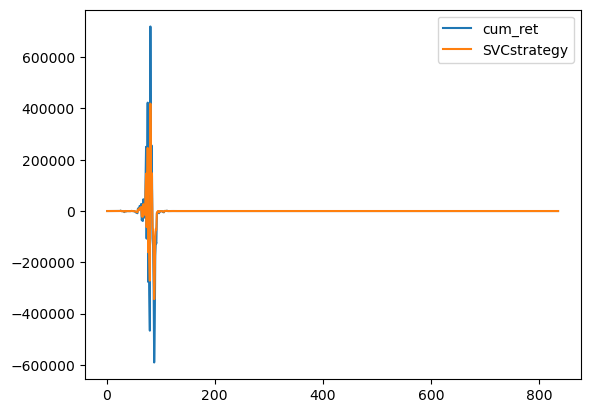

In [418]:
dat['SVCstrategy'] = (dat['SVCprediction'].shift(1) * dat['pctChg'] + 1).cumprod() # shift(1) means drag data down one line
dat['cum_ret'] = (dat['pctChg']+1).cumprod()
dat[['cum_ret','SVCstrategy']].dropna().plot()#figsize=(10, 6)

### 4. 决策树算法实现

In [491]:
dat_train

,volume,close,close -1d,close -2d,close -3d,close -4d,close -5d,close -6d,close -7d,prediction,...,SVCprediction,SVCstrategy,SVCcum_ret,DTprediction,DTstrategy,DTcum_ret,RFprediction,RFstrategy,KNNprediction,KNNstrategy
489,2.386374e+10,5458.0812,5470.4563,5577.9711,5596.3525,5441.1583,5495.4306,5513.6568,5417.6677,1.0,...,1.0,5.447879e-10,9.364903e-10,-1.0,-1.923507e-23,9.364903e-10,-1.0,-1.923507e-23,-1.0,1.030238e-23
77,1.033919e+10,3668.7250,3730.4510,3599.7000,3667.4570,3720.6680,3684.6160,3913.2110,3900.3330,1.0,...,1.0,-1.609110e+05,-2.766061e+05,-1.0,-7.242929e+01,-2.766061e+05,-1.0,-7.242929e+01,1.0,-3.813597e+02
211,1.115135e+10,3891.6530,3878.2060,3849.9940,3889.5980,3907.8640,3947.0390,3907.9290,3877.0890,1.0,...,1.0,-1.460634e-10,-2.510829e-10,-1.0,-1.756213e-12,-2.510829e-10,-1.0,-1.756213e-12,1.0,-2.531884e-10
367,2.460689e+10,4680.3046,4544.7007,4516.2532,4744.4687,4806.6902,4852.9612,4753.1333,4840.7712,1.0,...,1.0,-9.186132e-04,-1.579096e-03,1.0,-1.596409e-15,-1.579096e-03,1.0,-1.596409e-15,-1.0,4.338216e-09
107,1.240759e+10,3801.3090,3841.2650,3833.9380,3828.5180,3715.9380,3667.6180,3654.8240,3654.8790,1.0,...,1.0,1.184751e+02,2.036587e+02,-1.0,3.478787e+01,2.036587e+02,-1.0,3.478787e+01,-1.0,1.802597e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,1.583703e+10,3935.8110,3825.5870,3834.8170,3794.3310,3801.3090,3841.2650,3833.9380,3828.5180,1.0,...,1.0,5.891827e+02,1.012805e+03,1.0,3.940542e+00,1.012805e+03,1.0,3.940542e+00,-1.0,2.041863e-04
141,8.208306e+09,3699.1040,3633.5290,3669.2930,3621.4310,3636.3280,3675.6880,3747.4370,3803.4690,1.0,...,1.0,-3.852565e-04,-6.622559e-04,1.0,-1.424350e-03,-6.622559e-04,1.0,-1.424350e-03,-1.0,2.911100e-05
264,1.632362e+10,4057.5100,4077.4240,3987.7340,3959.9180,3984.4320,3952.4640,3916.0050,3899.8690,1.0,...,1.0,2.226437e-07,3.827244e-07,-1.0,3.220815e-15,3.827244e-07,-1.0,3.220815e-15,-1.0,-7.770502e-13
33,3.180774e+10,3848.0900,3816.0130,3794.1040,3749.7140,3669.3700,3678.3920,3684.6930,3729.4830,1.0,...,1.0,-2.441318e+03,-4.196625e+03,1.0,-9.906899e+02,-4.196625e+03,1.0,-9.906899e+02,-1.0,-2.356172e+00


In [492]:
from sklearn.tree import DecisionTreeClassifier

clf_DT = DecisionTreeClassifier()
clf_DT.fit(sklearn.preprocessing.scale(dat_train.loc[:,['volume','close','close -1d','close -2d','close -3d','close -4d','close -5d','close -6d','close -7d']]),l_train)      
pred_DT = clf_DT.predict(dat_test.loc[:,['volume','close','close -1d','close -2d','close -3d','close -4d','close -5d','close -6d','close -7d']])    

In [493]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred_DT, label_test)
acc

0.507177033492823

In [494]:
confusion_matrix(label_test, pred_DT)

array([[  0, 103],
       [  0, 106]], dtype=int64)

In [489]:
dat

,volume,pctChg,close,close -1d,close -2d,close -3d,close -4d,close -5d,close -6d,close -7d
0,7.178642e+09,0.719000,3094.7780,3072.6860,3078.4750,3047.7030,3054.3030,3035.8740,2964.8420,2969.5350
1,6.612170e+09,-0.872200,3067.7840,3094.7780,3072.6860,3078.4750,3047.7030,3054.3030,3035.8740,2964.8420
2,8.877296e+09,1.962500,3127.9900,3067.7840,3094.7780,3072.6860,3078.4750,3047.7030,3054.3030,3035.8740
3,8.021434e+09,0.021100,3128.6510,3127.9900,3067.7840,3094.7780,3072.6860,3078.4750,3047.7030,3054.3030
4,8.017487e+09,-0.550900,3111.4160,3128.6510,3127.9900,3067.7840,3094.7780,3072.6860,3078.4750,3047.7030
...,...,...,...,...,...,...,...,...,...,...
831,1.656664e+10,0.496361,4330.4328,4309.0444,4250.0614,4278.2178,4222.3114,4189.3527,4238.9936,4175.6747
832,1.646676e+10,-0.112393,4325.5657,4330.4328,4309.0444,4250.0614,4278.2178,4222.3114,4189.3527,4238.9936
833,1.585659e+10,-1.270192,4270.6227,4325.5657,4330.4328,4309.0444,4250.0614,4278.2178,4222.3114,4189.3527
834,1.708824e+10,1.715333,4343.8781,4270.6227,4325.5657,4330.4328,4309.0444,4250.0614,4278.2178,4222.3114


In [ ]:
dat['DTprediction'] = clf_DT.predict(dat.drop(['pctChg'],axis =1))

In [459]:
dat['DTprediction'] 

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
831    1.0
832    1.0
833    1.0
834    1.0
835    1.0
Name: DTprediction, Length: 836, dtype: float64

In [480]:
dat['DTstrategy'] = (dat['DTprediction'].shift(1) * dat['pctChg']+1).cumprod() # 
dat['cum_ret'] = (dat['pctChg']+1).cumprod()
print(dat[['cum_ret','DTstrategy']].dropna())
dat[['cum_ret','DTstrategy']].dropna().plot()#figsize=(10, 6)

KeyError: 'DTprediction'

### 4.1. 随机森林的算法实现

In [443]:
from sklearn.ensemble import RandomForestClassifier

clf_RF = RandomForestClassifier()
clf_RF = clf_RF.fit(dat_train,l_train)      
pred_RF = clf_RF.predict(dat_test)    

In [445]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred_RF, label_test)
acc

0.507177033492823

In [447]:
dat['RFprediction'] = clf_DT.predict(dat.loc[:,['volume','close','close -1d','close -2d','close -3d','close -4d','close -5d','close -6d','close -7d']].dropna())
#dat['RFprediction'] = clf_DT.predict(dat.drop(['RFcum_ret','RFprediction','RFstrategy','DTcum_ret','DTprediction','DTstrategy','prediction','cum_ret','strategy','pctChg','SVCprediction','SVCcum_ret','SVCstrategy'],axis=1).dropna())


In [427]:
confusion_matrix(label_test, pred_RF)

array([[47, 56],
       [53, 53]], dtype=int64)

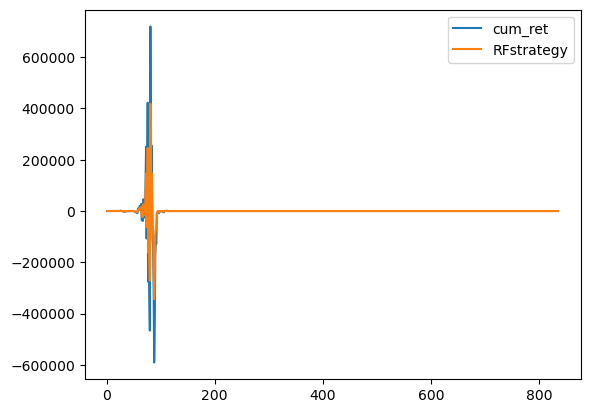

In [448]:
dat['RFstrategy'] = (dat['RFprediction'].shift(1) * dat['pctChg'] + 1).cumprod() # 
dat['cum_ret'] = (dat['pctChg']+1).cumprod()
dat[['cum_ret','RFstrategy']].dropna().plot()#figsize=(10, 6)

### 5. KNN算法实现

In [468]:
from sklearn.neighbors import KNeighborsClassifier

clf_KNN = KNeighborsClassifier(n_neighbors=10)
clf_KNN.fit(dat_train,l_train)   
pred_KNN = clf_KNN.predict(dat_test)


In [464]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred_KNN, label_test)
acc

0.48325358851674644

In [475]:
dat.loc[1:,'KNNprediction'] = clf_KNN.predict(dat.drop(['pctChg'],axis =1).dropna())

In [476]:
confusion_matrix(label_test, pred_KNN)

array([[49, 54],
       [54, 52]], dtype=int64)

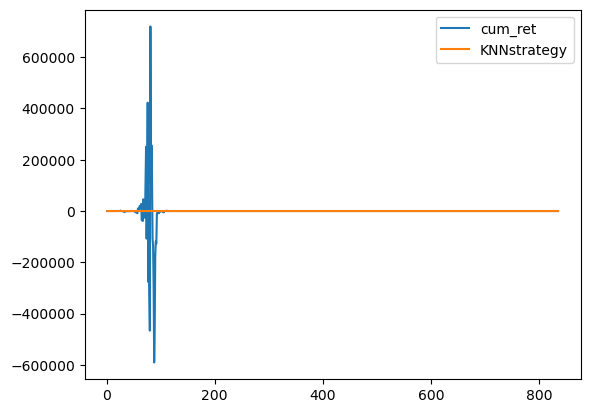

In [477]:
dat['KNNstrategy'] = (dat['KNNprediction'].shift(1) * dat['pctChg'] + 1).cumprod() # 
dat['cum_ret'] = (dat['pctChg']+1).cumprod()
dat[['cum_ret','KNNstrategy']].dropna().plot()#figsize=(10, 6)

In [ ]:
### 使用LASSO对cancer数据集进行模型选择

In [361]:
import math 
from sklearn.linear_model import Lasso

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

In [363]:
lasso = Lasso() # 默认alpha =1 
lasso.fit(dat_train,l_train)

train_score=lasso.score(dat_train,l_train)
test_score=lasso.score(dat_test,l_test)

coeff_used = np.sum(lasso.coef_!=0)
print("training score:", train_score )
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)


training score: 0.5316533129828008
test score:  0.5337363095533671
number of features used:  6


In [401]:
lasso001 = Lasso(alpha=0.01, max_iter=100000)
lasso001.fit(dat_train,l_train)

train_score001=lasso001.score(dat_train,l_train)
test_score001=lasso001.score(dat_test,l_test)

coeff_used001 = np.sum(lasso001.coef_!=0)
print ("training score for alpha=0.01:", train_score001 )
print ("test score for alpha =0.01: ", test_score001)
print ("number of features used: for alpha =0.01:", coeff_used001)


training score for alpha=0.01: 0.5354026142093831
test score for alpha =0.01:  0.5371229626309884
number of features used: for alpha =0.01: 9


In [400]:
'''features_train, features_test, label_train, label_test'''
lasso00001 = Lasso(alpha=0.0001, max_iter=100000)
lasso00001.fit(dat_train,l_train)

train_score00001=lasso00001.score(dat_train,l_train)
test_score00001=lasso00001.score(dat_test,l_test)

coeff_used00001 = np.sum(lasso00001.coef_!=0)
print ("training score for alpha=0.0001:", train_score00001)
print( "test score for alpha =0.0001: ", test_score00001)
print ("number of features used: for alpha =0.0001:", coeff_used00001)


training score for alpha=0.0001: 0.5354031070169132
test score for alpha =0.0001:  0.537122251334716
number of features used: for alpha =0.0001: 9


In [385]:
LinearRegression?

Init signature:
LinearRegression(
    *,
    fit_intercept=True,
    copy_X=True,
    n_jobs=None,
    positive=False,
)
Docstring:     
Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
to minimize the residual sum of squares between the observed targets in
the dataset, and the targets predicted by the linear approximation.

Parameters
----------
fit_intercept : bool, default=True
    Whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (i.e. data is expected to be centered).

copy_X : bool, default=True
    If True, X will be copied; else, it may be overwritten.

n_jobs : int, default=None
    The number of jobs to use for the computation. This will only provide
    speedup in case of sufficiently large problems, that is if firstly
    `n_targets > 1` and secondly `X` is sparse or if `positive` is set
    to `True`. ``None`` means 1 unless in a
    :obj:`

In [384]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(dat_train,l_train)
lr_train_score=lr.score(dat_train,l_train)
lr_test_score=lr.score(dat_test,l_test)
print ("LR training score:", lr_train_score )
print ("LR test score: ", lr_test_score)


LR training score: 0.5354031070641796
LR test score:  0.5371222074931845


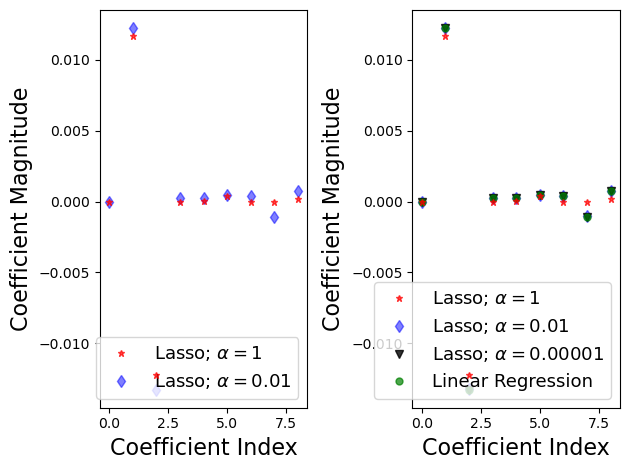

In [432]:

plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()
